# **Unveiling Emotions through Text: An NLP-based Approach**

# Team Members

*   BT21CSE151 - Pankaj Paliwal
*   BT21CSE176 - Arushi Bhagat
*   BT21CSE187 - Dhruv Nawria
*   BT21CSE205 - Swarnal Dhakre




# Introduction
Our project, Emotion Analysis using Natural Language Processing (NLP), aims to decipher the sentiment, mood, or emotional state expressed in written text.

The Emotions dataset is designed to facilitate research and exploration in natural language processing (NLP) and emotion analysis. It contains diverse text samples, each labeled with one of the six fundamental emotions it conveys.
Six categories:
sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5).


The purpose of this data is to construct and train a model capable of analyzing text samples to detect and categorize various emotions.

In [1]:
# Importing Modules

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import collections

import contractions
import nlp_utils as nu

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string

In [2]:
# NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Data Preprocessing

In [3]:
# Preprocessing the text

def preprocess_text(text):

  # Remove HTML tags
  text = re.sub(r'<[^>]+>', '', text)

  # Lowercasing
  text = text.lower()

  # Tokenization
  tokens = word_tokenize(text)

  # Removing Punctuation and Special Characters
  table = str.maketrans('', '', string.punctuation)
  tokens = [word.translate(table) for word in tokens]

  conm = contractions.CONTRACTION_MAP
  for key,value in conm.items():
    text = re.sub(r"\b" + re.escape(key) + r"\b", value, text)

  # Removing Stopwords
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word not in stop_words]

  # Stemming
  # stemmer = PorterStemmer()
  # tokens = [stemmer.stem(word) for word in tokens]

  # Lemmatization
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(word) for word in tokens]

  return ' '.join(tokens)

In [4]:
# Load the Emotions dataset
df = pd.concat(
  map(pd.read_csv, ['training.csv', 'validation.csv', 'test.csv']), ignore_index=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20000 non-null  object
 1   label   20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [6]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [7]:
label_mapping = {
  0: "Sadness",
  1: "Joy",
  2: "Love",
  3: "Anger",
  4: "Fear",
  5: "Suprise"
}

# Replace numbers in the label column with actual emotions
df["label"] = df["label"].map(label_mapping)

In [8]:
print("Number of samples per class:")
count = df["label"].value_counts()
labels = count.index
values = count.values
print(count)

Number of samples per class:
label
Joy        6761
Sadness    5797
Anger      2709
Fear       2373
Love       1641
Suprise     719
Name: count, dtype: int64


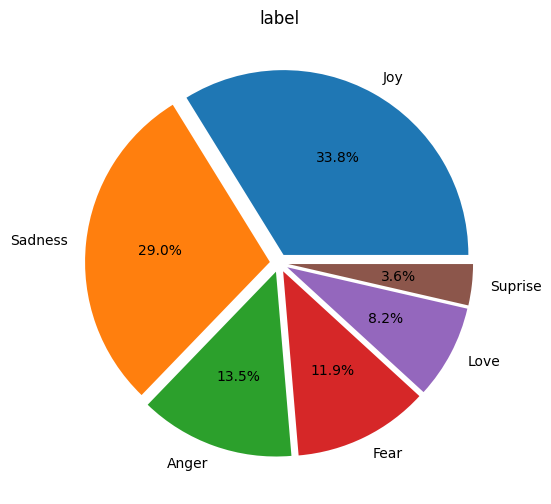

In [9]:
plt.figure(figsize=(8,6))
plt.pie(values, labels=labels, autopct="%1.1f%%", explode=len(labels)*[0.05])
plt.title("label")
plt.show()

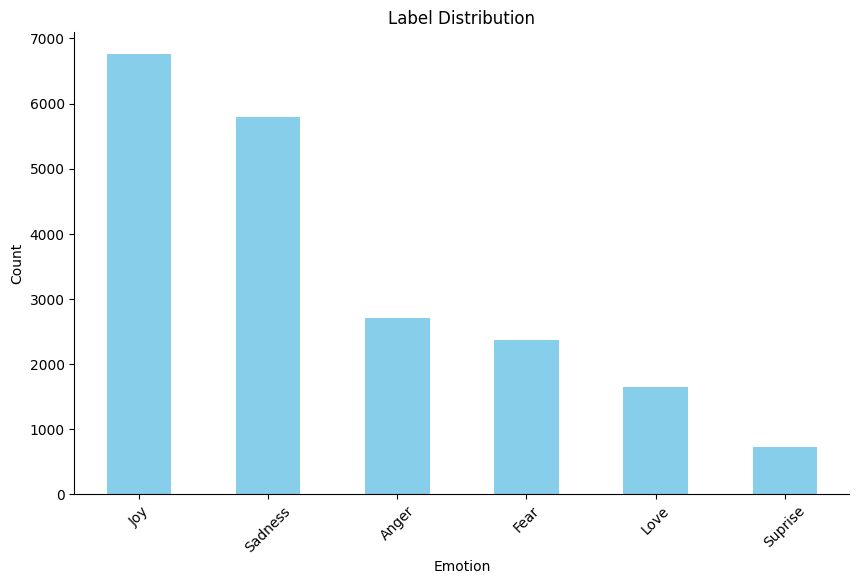

In [10]:
label_counts = df['label'].value_counts()

plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Label Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


In [11]:
df["Preprocessed Text"] = df["text"].apply(preprocess_text)

In [12]:
df.head()

,text,label,Preprocessed Text
0,i didnt feel humiliated,Sadness,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,Sadness,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,Anger,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,Love,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,Anger,feeling grouchy


Word Clouds: Create word clouds for each class/emotion to visually represent the most frequent words. This can give a quick overview of the most prominent terms associated with each emotion.

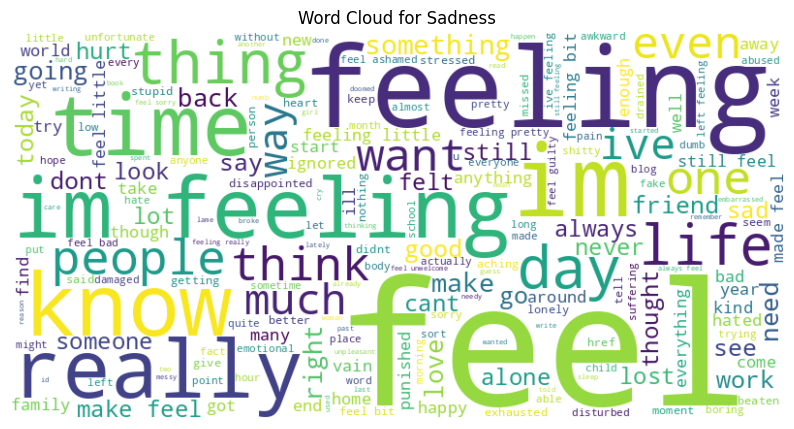

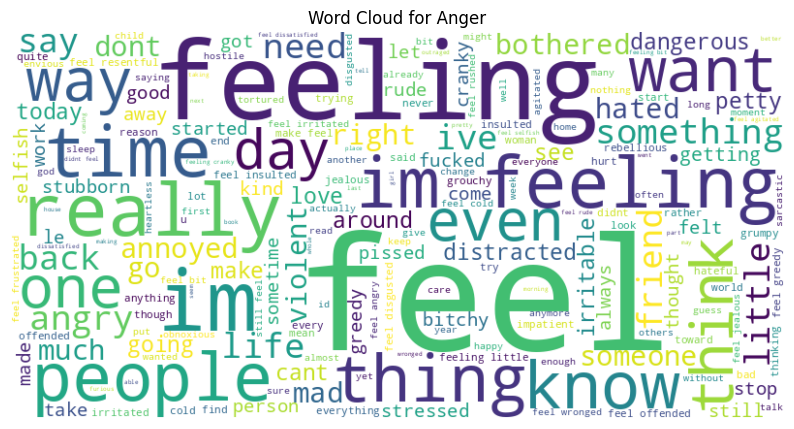

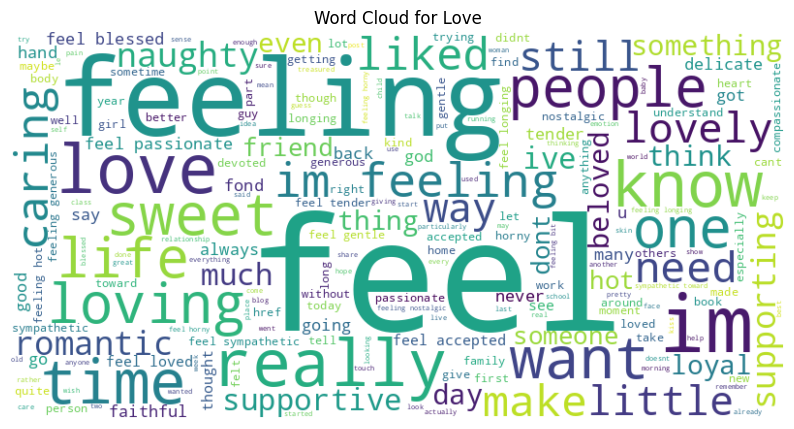

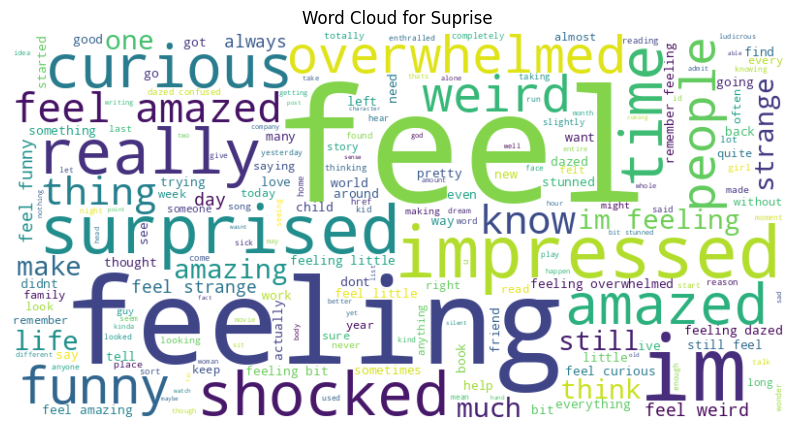

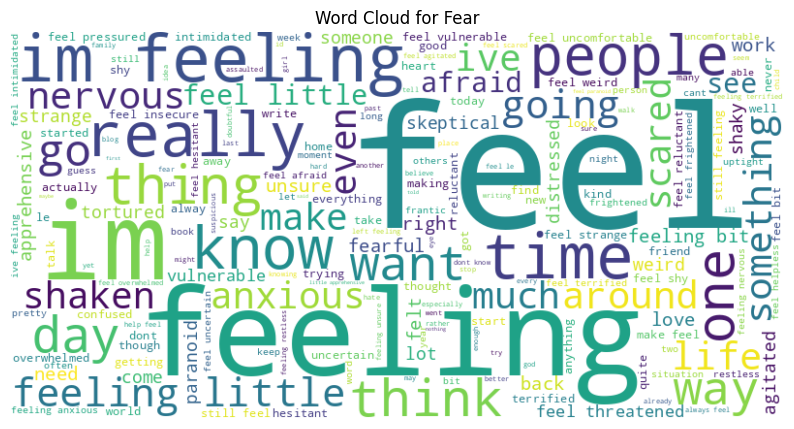

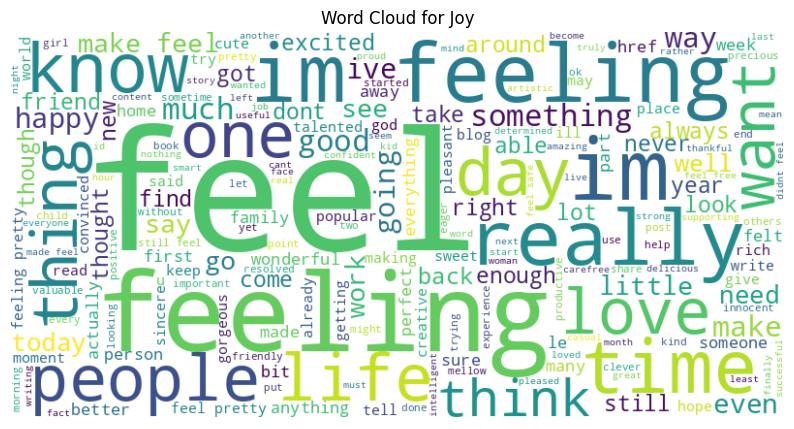

In [13]:
from wordcloud import WordCloud

# Generate word clouds for each class
for emotion in df["label"].unique():
  text = " ".join(df[df["label"] == emotion]["Preprocessed Text"])
  if len(text) > 0:
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Word Cloud for {emotion}")
    plt.axis("off")
    plt.show()
  else:
    print(f"No words found for emotion: {emotion}")


N-gram Analysis: Investigate the distribution of n-grams (sequences of n words) within the text data. This can reveal important phrases or patterns specific to each emotion.

In [14]:
from collections import Counter
from nltk.util import ngrams

# Function to generate n-grams for text
def generate_ngrams(text, n):
  tokens = word_tokenize(text)
  return list(ngrams(tokens, n))

# Example: Generate and count trigrams for each class
for emotion in df["label"].unique():
  text = " ".join(df[df["label"] == emotion]["Preprocessed Text"])
  trigrams = generate_ngrams(text, 5)
  trigram_counts = Counter(trigrams)
  print(f"Emotion: {emotion}")
  print(trigram_counts.most_common(10))
  print()


Emotion: Sadness
[(('feel', 'unwelcome', 'work', 'sometimes', 'think'), 3), (('unwelcome', 'work', 'sometimes', 'think', 'people'), 3), (('work', 'sometimes', 'think', 'people', 'might'), 3), (('sometimes', 'think', 'people', 'might', 'talking'), 3), (('life', 'like', 'game', 'sometimes', 'came'), 3), (('like', 'game', 'sometimes', 'came', 'around'), 3), (('game', 'sometimes', 'came', 'around', 'wall'), 3), (('nothing', 'surround', 'keep', 'fear', 'im'), 3), (('surround', 'keep', 'fear', 'im', 'unprotected'), 3), (('keep', 'fear', 'im', 'unprotected', 'see'), 3)]

Emotion: Anger
[(('think', 'would', 'come', 'fast', 'would'), 2), (('would', 'come', 'fast', 'would', 'come'), 2), (('come', 'fast', 'would', 'come', 'suppose'), 2), (('fast', 'would', 'come', 'suppose', 'feel'), 2), (('would', 'come', 'suppose', 'feel', 'cranky'), 2), (('come', 'suppose', 'feel', 'cranky', 'today'), 2), (('feel', 'irritated', 'feel', 'like', 'im'), 2), (('attempt', 'convince', 'others', 'think', 'truly'), 2)

## Feature extraction




In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(df["Preprocessed Text"])
y = df["label"]

## Model Training

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=40)

In [18]:
models = {
  "Logistic Regression": LogisticRegression(max_iter=1000),
  "Decision Tree": DecisionTreeClassifier(),
  "Random Forest": RandomForestClassifier(n_estimators=100),
  "K Nearest Neighbors": KNeighborsClassifier(),
  "SVM": SVC(kernel='linear'),
  "Naive-Bayes": MultinomialNB()
}

In [19]:
for name, model in models.items():
  print(f"Training {name}...")
  model.fit(X_train, y_train)

Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training K Nearest Neighbors...
Training SVM...
Training Naive-Bayes...


## Model Evaluation

In [20]:
for name, model in models.items():
  y_pred = model.predict(X_test)
  print(f"Evaluation for {name}:")
  print(classification_report(y_test, y_pred))
  print("-" * 50)

Evaluation for Logistic Regression:
              precision    recall  f1-score   support

       Anger       0.88      0.78      0.83       511
        Fear       0.87      0.73      0.79       449
         Joy       0.82      0.93      0.87      1363
        Love       0.84      0.68      0.75       340
     Sadness       0.87      0.90      0.89      1188
     Suprise       0.84      0.65      0.73       149

    accuracy                           0.85      4000
   macro avg       0.85      0.78      0.81      4000
weighted avg       0.85      0.85      0.85      4000

--------------------------------------------------
Evaluation for Decision Tree:
              precision    recall  f1-score   support

       Anger       0.78      0.80      0.79       511
        Fear       0.76      0.75      0.75       449
         Joy       0.84      0.83      0.84      1363
        Love       0.74      0.75      0.75       340
     Sadness       0.88      0.86      0.87      1188
     Suprise   

## Hyperparameter Tuning

In [21]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid for each classifier
param_grids = {
  "Logistic Regression": {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
  "Decision Tree": {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10]},
  "Random Forest": {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]},
  "K Nearest Neighbors": {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
  "SVM": {'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']},
  "Naive Bayes": {}
}

In [22]:
# Perform grid search for each classifier
best_models = {}
for name, classifier in models.items():
  print(f"Performing grid search for {name}...")
  param_grid = param_grids.get(name, {})
  grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
  grid_search.fit(X_train, y_train)
  best_model = grid_search.best_estimator_
  best_models[name] = best_model
  print(f"Best hyperparameters for {name}: {grid_search.best_params_}")
  print(f"Best cross-validation accuracy: {grid_search.best_score_}")
  print("-" * 50)

Performing grid search for Logistic Regression...
Best hyperparameters for Logistic Regression: {'C': 10}
Best cross-validation accuracy: 0.8534374999999998
--------------------------------------------------
Performing grid search for Decision Tree...
Best hyperparameters for Decision Tree: {'max_depth': None, 'min_samples_split': 10}
Best cross-validation accuracy: 0.8172500000000001
--------------------------------------------------
Performing grid search for Random Forest...
Best hyperparameters for Random Forest: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validation accuracy: 0.8528125
--------------------------------------------------
Performing grid search for K Nearest Neighbors...
Best hyperparameters for K Nearest Neighbors: {'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation accuracy: 0.552625
--------------------------------------------------
Performing grid search for SVM...
Best hyperparameters for SVM: {'C': 1, 'kernel': 'line

In [23]:
# Evaluate the best models on the test set
for name, model in best_models.items():
  print(f"Evaluating best model for {name} on the test set...")
  y_pred = model.predict(X_test)
  print(f"Evaluation for {name}:")
  print(classification_report(y_test, y_pred))
  print("-" * 50)

Evaluating best model for Logistic Regression on the test set...
Evaluation for Logistic Regression:
              precision    recall  f1-score   support

       Anger       0.83      0.81      0.82       511
        Fear       0.86      0.75      0.80       449
         Joy       0.86      0.92      0.88      1363
        Love       0.81      0.72      0.76       340
     Sadness       0.90      0.90      0.90      1188
     Suprise       0.75      0.73      0.74       149

    accuracy                           0.86      4000
   macro avg       0.83      0.81      0.82      4000
weighted avg       0.86      0.86      0.86      4000

--------------------------------------------------
Evaluating best model for Decision Tree on the test set...
Evaluation for Decision Tree:
              precision    recall  f1-score   support

       Anger       0.76      0.80      0.78       511
        Fear       0.75      0.76      0.75       449
         Joy       0.82      0.84      0.83      1363

In [31]:
import joblib

# Saving the TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")
# Saving the trained model
joblib.dump(best_models["Logistic Regression"], "emotion_classifier_model.pkl")

['emotion_classifier_model.pkl']

In [32]:
# Load the TF-IDF vectorizer and trained model
tfidf_vectorizer = joblib.load("tfidf_vectorizer.pkl")
model = joblib.load("emotion_classifier_model.pkl")

def preprocess_text(text):
  text = re.sub(r'<[^>]+>', '', text)
  text = text.lower()
  tokens = word_tokenize(text)

  table = str.maketrans('', '', string.punctuation)
  tokens = [word.translate(table) for word in tokens]

  conm = contractions.CONTRACTION_MAP
  for key,value in conm.items():
    text = re.sub(r"\b" + re.escape(key) + r"\b", value, text)

  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word not in stop_words]

  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(word) for word in tokens]

  return ' '.join(tokens)

def predict_emotion(text):
  preprocessed_text = preprocess_text(text)
  transformed_text = tfidf_vectorizer.transform([preprocessed_text])
  prediction = model.predict(transformed_text)
  return prediction[0]

def main():
  print("Welcome to the Emotion Predictor CLI!")
  while True:
    user_input = input("Enter text to predict emotion (type 'exit' to quit): ")
    if user_input.lower() == 'exit':
      print("Exiting...")
      break
    else:
      emotion = predict_emotion(user_input)
      print("Predicted emotion:", emotion)

if __name__ == "__main__":
    main()


Welcome to the Emotion Predictor CLI!
Enter text to predict emotion (type 'exit' to quit): i feel too sad
Predicted emotion: Sadness
Enter text to predict emotion (type 'exit' to quit): exit
Exiting...
